In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

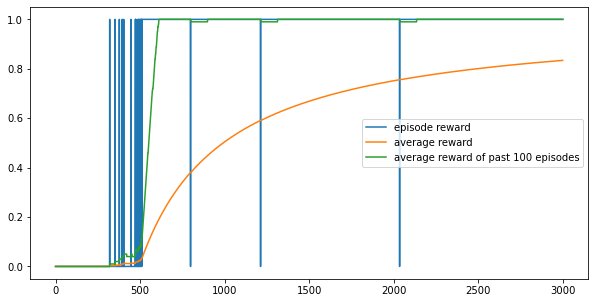

In [8]:
class Agent:
    
    def __init__(self, n_states, n_actions, eps_init=.9, eps_min=0.001):
        self.n_states = n_states
        self.n_actions = n_actions
        self.eps = eps_init
        self.eps_min = eps_min
        self.Q = np.zeros(shape=(n_states, n_actions))
        
    def act(self, state):
        '''
        Choose an action according to an epsilon-greedy policy with decaying epsilon. 
        Ties are broken uniformly at random.
        '''
        if np.random.random() < self.eps:
            return np.random.randint(self.n_actions)
        
        # epsilon decay
        if self.eps > self.eps_min:
            self.eps *= 0.999
            
        # find all actions that maximize Q(s,a) (there may be more than one)
        best_actions = np.argwhere(self.Q[state] == self.Q[state].max()).flatten()
        # choose one of the best actions uniformly at random.
        return np.random.choice(best_actions)

def q_learning(env, n_episodes=1000, gamma=0.99, alpha=0.9):
    
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    agent = Agent(n_states, n_actions)    
    
    episode_rewards = []

    for i in range(n_episodes):
        
        state = env.reset()
        done = False
        
        episode_reward = 0

        while not done:
            action = agent.act(state)
            next_state, reward, done, info = env.step(action)
            agent.Q[state, action] = (1-alpha)*agent.Q[state, action] + alpha*(reward + gamma*np.max(agent.Q[next_state]))
            
            state = next_state
            
            episode_reward += reward
        
        episode_rewards.append(episode_reward) # reward = reward from the final step of the episode
    
#         if i % 100 == 0:
#             end = len(episode_rewards)
#             start = max(end-100, 0)
#             avg_reward = np.average(episode_rewards[start:end])
#             print('episode: {} reward: {}'.format(i, avg_reward))
    
    
#     print(agent.Q)
#     print('number of successes: {}'.format(sum(episode_rewards)))
    
    plt.figure(figsize=(10,5))
    plt.plot(episode_rewards, label='episode reward')
    
    avgs = [np.average([episode_rewards[:i]]) for i in range(1, len(episode_rewards))]
    plt.plot(avgs, label='average reward')
    
    avgs_window = avgs[:100] + [np.average([episode_rewards[i:i+100]]) for i in range(0, len(episode_rewards)-100)]
    plt.plot(avgs_window, label='average reward of past 100 episodes')
    
    plt.legend()
    plt.show()
    
    
    return agent.Q
    
    
env = gym.make('FrozenLake8x8-v0', is_slippery=False)
# env = gym.make('FrozenLake-v0', is_slippery=False)


Q = q_learning(env, n_episodes=3000, gamma=0.99, alpha=0.8)  

<!-- Interestingly, performance is not strongly related to gamma. Things collapse only when gamma is set to 0 exactly. gamma = 0.001 doesn't even cause issues. Same thing with alpha.

I should also look at decay rate.

jump is much more sudden for 8x8 case.

alpha = 0.7 or 0.8 seems optimal. No obvious trend for gamma.

check convergence rate.
for 4x4 you can see that we do indeed converge to the optimal Q. Not for 8x8 though, since states are not all visited equally often. Need a lot more exploration. We don't need this though. We can find an optimal (or near optimal) policy without having a near-perfect Q table.  -->